Import the Wine dataset from the scikit-learn library and create a linear SVM to classify "class" of the wine, based on the features "alcohol" and "flavanoids".

In [1]:
from sklearn.datasets import load_wine
raw_data = load_wine()

In [2]:
import pandas as pd
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [3]:
X=data[['alcohol','flavanoids']]
y=data['class']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



In [5]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9166666666666666

Visualize the relationship between the three variables.

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


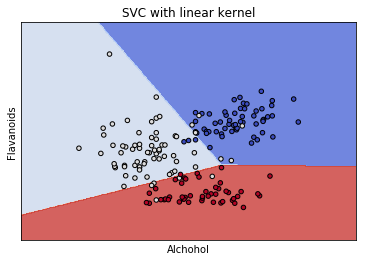

In [8]:
import numpy as np
import matplotlib.pyplot as plt
wine = load_wine()
# Take the first two features. We could avoid this by using a two-dim dataset
X = wine.data[:, [0,6]]
y = wine.target
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax,clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
from sklearn.svm import LinearSVC
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = LinearSVC(C=C,random_state=42)
models = models.fit(X, y) 

# title for the plots
titles = ('SVC with linear kernel')

# Set-up 2x2 grid for plotting.
#fig, sub = plt.subplots(0, 0)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
#print(X1)
#print(X0)
xx, yy = make_meshgrid(X0, X1)
#for clf, title, ax in (models, titles, sub.flatten()):
#ax=sub.flatten()
plot_contours(plt,models, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alchohol')
plt.ylabel('Flavanoids')
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.show()

Create a SVM model, Decision Tree model and Ensemble model of your choice.

Compare the performance of all the three models.

Here in the below code I am taking all the features to create a model because the question asks us to create the SVM model again and I believe the variation is to create a SVM model with all the features rather than taking alchohols and flavanoids

In [9]:
X=data.drop(['class'], axis=1)
y=data['class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



In [11]:
from sklearn import svm
svm1_clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm1_clf.score(X_test, y_test)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4166666666666667

In [12]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred=dec_clf.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

1.0

In [13]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred=mlp_clf.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.2222222222222222

In [14]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('svm', svm1_clf), ('dec', dec_clf), ('mlp', mlp_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('svm', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)), ('dec', DecisionTreeClassifier(class_weight=...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [15]:
for clf in (svm1_clf, dec_clf, mlp_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.4166666666666667
DecisionTreeClassifier 1.0
MLPClassifier 0.2222222222222222
VotingClassifier 0.9722222222222222


C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The above block of code represents the ensemble model in which I have the individual models as SVM, Decision Tree and Multi-Layer Perceptron and compares the performance of three models interms of accuracy

Try changing the Hyperparameters(of your choice) for these models and in a comment discuss breifly the impact this hyperparameter have on your models.

In [16]:
from sklearn import svm
svm1_clf = svm.SVC(kernel='rbf', C=10).fit(X_train, y_train)
svm1_clf.score(X_test, y_test)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4722222222222222

In the above block of code I had altered the value of regularization Parameter i.e., C to 10 and can see that there is a surge in accuracy which might be due to over-fitting

In [17]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=2,max_features=3,random_state=42)
dec_clf.fit(X_train, y_train)
y_pred=dec_clf.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9444444444444444

In the above implementation of code I had given the max_depth of Decision Tree as 2 it seems to regularize the model to some extent as previous model was resulting in 100 % accuracy which is due to overfitting

In [18]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=42,hidden_layer_sizes=(150,),activation='logistic')
mlp_clf.fit(X_train, y_train)
y_pred=mlp_clf.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0

In the above code I am increasing the number of hidden layers in the multi-layer perceptron and we can blatantly see that the model is trying to overfit the data